# Introduction #

Build a model to predict hotel cancellations with a binary classifier.

Data link: https://www.kaggle.com/jessemostipak/hotel-booking-demand

## Necessary Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load the *Hotel Cancellations* dataset.

In [3]:
hotel = pd.read_csv('/content/gdrive/My Drive/My_Learning_Folder/Dataset/Hotel Cancellation Prediction Dataset/hotel.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#Checking Missing Values
print('====================If any missing values==========================')
print(hotel.isnull().values.any())
print('====================How many missing values========================')
print(hotel.isnull().sum().sum())
print('====================Missing values in Various Columns==============')
print(hotel.isnull().sum())

====================If any missing values==========================
True
====================How many missing values========================
129425
====================Missing values in Various Columns==============
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reser

## Features and Labels

In [5]:
X = hotel.copy()
y = X.pop('is_canceled')

# Data Preprocessing

In [6]:
#Convert Categorical Months into Numbers
X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

# Define Model

Model-> ***BatchNorm(input_shape=input_shape),Dense(256,activation='relu'),BatchNorm(),Dropout(0.3),Dense(256,activation='relu'),BatchNorm(),Dropout(0.3),Dense(1,activation='sigmoid')***

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])


# Add Optimizer, Loss, and Metric 

Now compile the model with the Adam optimizer and binary versions of the cross-entropy loss and accuracy metric.

In [8]:
model.compile(
    optimizer='ADAM',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

# Train

Epoch 1/200
175/175 [==============================] - 1s 6ms/step - loss: 0.4696 - binary_accuracy: 0.7759 - val_loss: 0.4359 - val_binary_accuracy: 0.8017
Epoch 2/200
175/175 [==============================] - 1s 5ms/step - loss: 0.4206 - binary_accuracy: 0.8019 - val_loss: 0.4079 - val_binary_accuracy: 0.8098
Epoch 3/200
175/175 [==============================] - 1s 5ms/step - loss: 0.4048 - binary_accuracy: 0.8099 - val_loss: 0.4014 - val_binary_accuracy: 0.8138
Epoch 4/200
175/175 [==============================] - 1s 5ms/step - loss: 0.3987 - binary_accuracy: 0.8141 - val_loss: 0.3966 - val_binary_accuracy: 0.8175
Epoch 5/200
175/175 [==============================] - 1s 5ms/step - loss: 0.3920 - binary_accuracy: 0.8173 - val_loss: 0.3909 - val_binary_accuracy: 0.8206
Epoch 6/200
175/175 [==============================] - 1s 5ms/step - loss: 0.3897 - binary_accuracy: 0.8196 - val_loss: 0.3872 - val_binary_accuracy: 0.8210
Epoch 7/200
175/175 [==============================] - 1s 

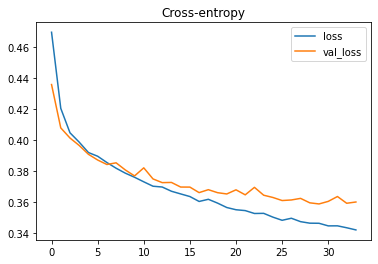

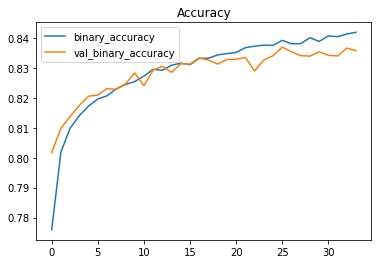

In [9]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")